### Trabajo semanal 11- Síntesis de func. transferencia descargadas NO disipativas
## Nicolas Albano 

1) Ej. 6 TP Síntesis de Cuadripolos) 

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:

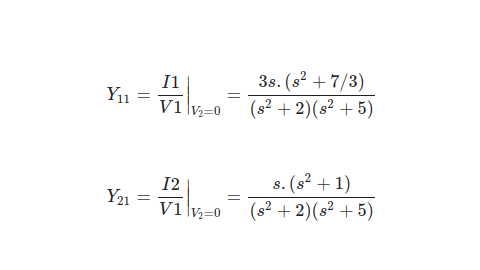

a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.

b) Calcular el valor de los componentes, es decir la síntesis analítica.

c) Verificar los parámetros en el cuadripolo sintetizado.

2) Sintetizar un cuadripolo que implemente la siguiente transferencia de tensiones en vacío:

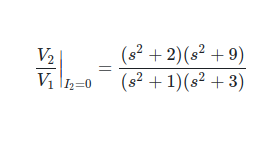

a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.

b) Calcular el valor de los componentes, es decir la síntesis analítica.

c) Verificar los parámetros en el cuadripolo sintetizado.

In [2]:
import sympy as sp
from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown
s = sp.symbols('s ', complex=True)

# Defino Y
Y = (3*s**3 + 7*s) / (s**4 + 7*s**2 + 10)
print_latex(a_equal_b_latex_s('Y(s)', Y))

<IPython.core.display.Math object>

In [3]:
# Removemos polo en W=1

Z=1/Y

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(Z, omega_zero = omega_L2C2 )

C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print(C2)
print(L2)
print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

2
1/2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
Z6, Z4t=remover_polo_infinito(1/Y4)


print_latex(a_equal_b_latex_s('Z4t(s)', Z4t))
print_latex(a_equal_b_latex_s('Z6(s)', Z6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ejercicio 2

In [6]:
Z11= ((s**2+1)*(s**2+3))/(s*(s**2+1.5)*(s**2+4))
print_latex(a_equal_b_latex_s('Z11(s)',Z11))


<IPython.core.display.Math object>

In [26]:
# Remocion parcial en W=3
omega_C1=3
Y3, Yc1 = remover_polo_infinito(1/Z11, omega_zero = omega_C1 )

C1=Yc1/s
#num, den = Y3.as_numer_denom()
#roots_num = sp.solve(num, s, dict=True)
#print(roots_num)

#roots_den = sp.solve(den, s, dict=True)
#print(roots_den)

print_latex(a_equal_b_latex_s('Y_3(s)', Y3))
print(Yc1)
print(C1)

<IPython.core.display.Math object>

0.78125*s
0.781250000000000


In [27]:
#Z3=1/Y3 
# Preguntar al profe si tal vez es algo del codigo lo que anda mal porq el residuo me da bien pero no asi la funcion inmitancia que me devuelve
# Si hardcode la funcion me dan bien los resultados 
Z3=((s**2+1)*(s**2+3))/(s*(s**2+9)*(s**2+(13/7)))

Z5, Zt2, L2, C2 = remover_polo_jw(Z3, isImpedance = True, omega = omega_C1 )

# Estos me dan bien 
print(C2)
print(L2)
print_latex(a_equal_b_latex_s('Zt2(s)', Zt2))
print_latex(a_equal_b_latex_s('Z_5(s)', Z5))

1.33928571428571
0.0829629629629630


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
# Celda auxiliar para verificar si la resta en papel me daba bien las raices
num= (19/75)* s**4 +196/75*s**2+3

roots_num = sp.solve(num, s, dict=True)
print(roots_num)

[{s: -3.0*I}, {s: -1.14707866935281*I}, {s: 1.14707866935281*I}, {s: 3.0*I}]


In [29]:
num_y7=72/91 * s**3 + 144/91 * s

roots_num = sp.solve(num_y7, s, dict=True)
print(roots_num)

[{s: 0.0}, {s: -1.4142135623731*I}, {s: 1.4142135623731*I}]


In [30]:
num_z9=25/38 * s**2 +25/19
roots_num = sp.solve(num_z9, s, dict=True)
print(roots_num)

[{s: -1.4142135623731*I}, {s: 1.4142135623731*I}]
